In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model, load_model

Using TensorFlow backend.


In [2]:
def ClassLabel(i):
    if i == 0:
        return 'circle'
    elif i == 1:
        return 'square'
    elif i == 2:
        return 'star'
    elif i == 3:
        return 'triangle'

In [3]:
X = []
Y = []

for i in range(1, 2000):
    img = Image.open('Shapes/' + str(i) + '.png')
    rgb_im = img.convert('RGB')
    data = np.asarray(rgb_im, dtype="int32") / 255
    
    X.append(data)

    if i < 500:
        Y.append(0) # circle

    elif i >= 500 and i < 1000:
        Y.append(1) # square

    elif i >= 1000 and i < 1500:
        Y.append(2) # star

    elif i >= 1500:
        Y.append(3) # triangle

In [4]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
X_train_original = np.asarray(X_train_original)
X_test_original = np.asarray(X_test_original)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
encoder = load_model('encoder.h5')

Instructions for updating:
Colocations handled automatically by placer.


/home/caio/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
X_train_encoded = encoder.predict(X_train_original)
X_test_encoded = encoder.predict(X_test_original)

In [8]:
input_img = Input(shape=(32,32,3,))
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(2, (3, 3), activation='relu', padding='same')(pool2)

dense1 = Flatten()(conv3)
dense2 = Dense(64)(dense1)
dense3 = Dense(16)(dense2)

preds = Dense(4, activation='sigmoid', name='final')(dense3)

Classificador_encoded = Model(input_img,preds)

Classificador_encoded.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
Classificador_encoded.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 2)           74        
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [10]:
h = Classificador_encoded.fit(X_train_encoded, y_train,
                epochs=15,
                batch_size=32,
                shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1599/1599 [==============================] - 1s 820us/step - loss: 1.2087 - acc: 0.5191
Epoch 2/15
1599/1599 [==============================] - 1s 529us/step - loss: 0.7669 - acc: 0.5897
Epoch 3/15
1599/1599 [==============================] - 1s 515us/step - loss: 0.5964 - acc: 0.7192
Epoch 4/15
1599/1599 [==============================] - 1s 518us/step - loss: 0.4195 - acc: 0.8286
Epoch 5/15
1599/1599 [==============================] - 1s 513us/step - loss: 0.3617 - acc: 0.8824
Epoch 6/15
1599/1599 [==============================] - 1s 522us/step - loss: 0.2054 - acc: 0.9262
Epoch 7/15
1599/1599 [==============================] - 1s 518us/step - loss: 0.1266 - acc: 0.9600
Epoch 8/15
1599/1599 [==============================] - 1s 526us/step - loss: 0.0299 - acc: 0.9994
Epoch 9/15
1599/1599 [==============================] - 1s 526us/step - loss: 0.0186 - acc: 0.9981
Epoch 10/15
1599/1599 [==============================] - 1s 5

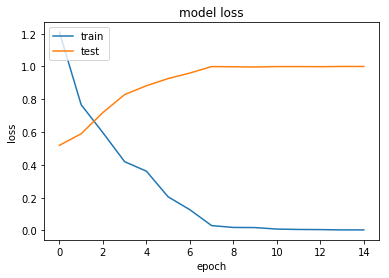

In [11]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
Classificador_encoded.evaluate(X_test_encoded,y_test)

400/400 [==============================] - 0s 524us/step


[nan, 0.9975]

In [13]:
X_predicted = Classificador_encoded.predict(X_test_encoded)

circle


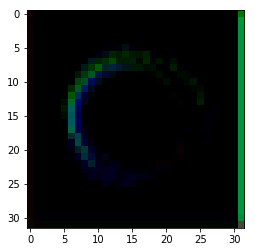

circle


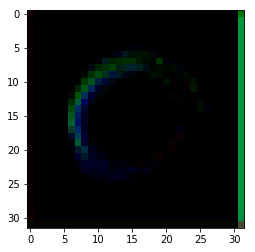

circle


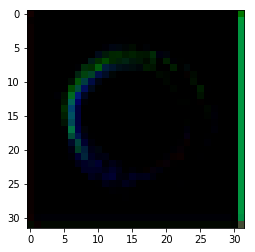

square


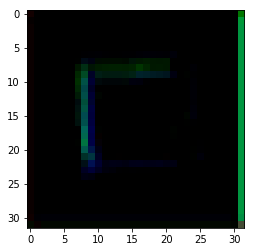

star


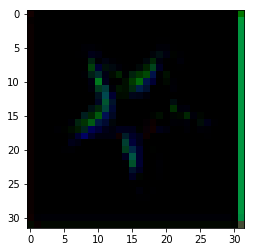

triangle


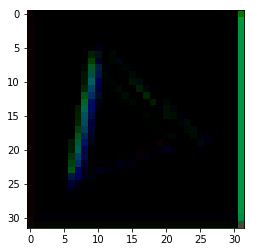

circle


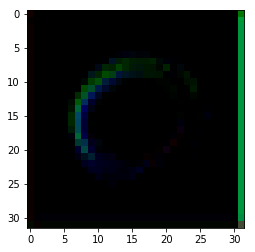

triangle


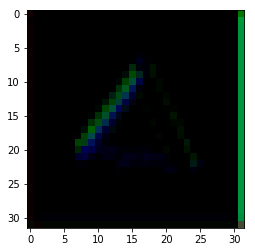

circle


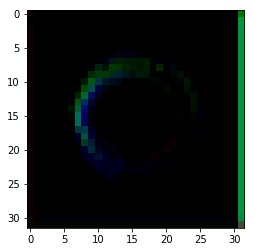

triangle


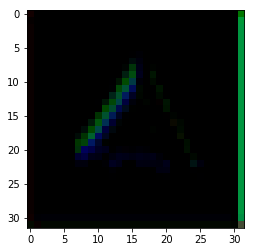

circle


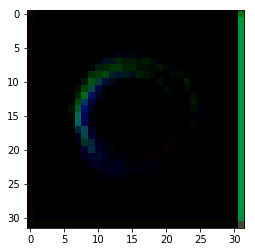

triangle


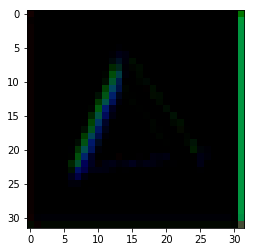

star


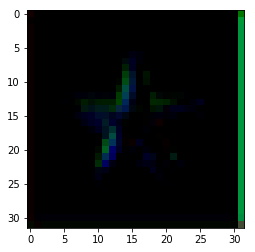

square


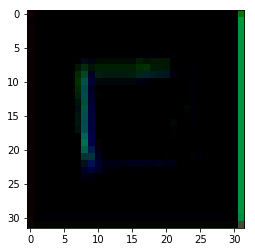

star


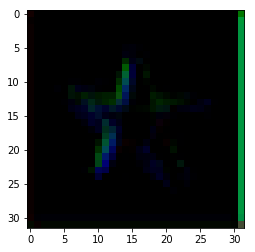

circle


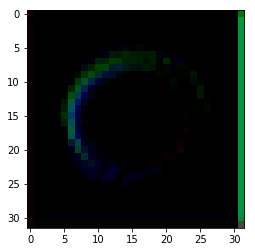

square


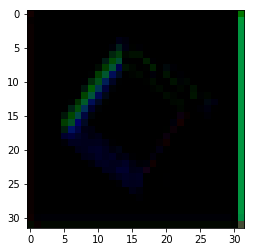

circle


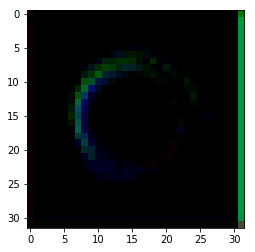

star


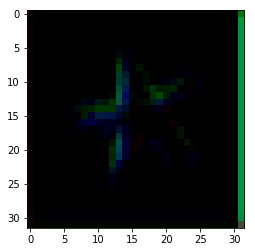

triangle


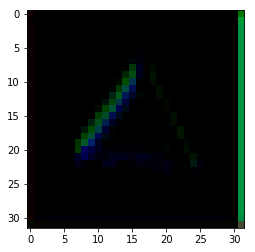

triangle


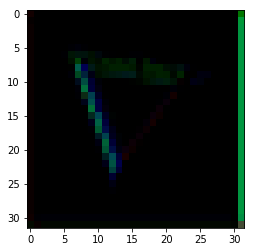

square


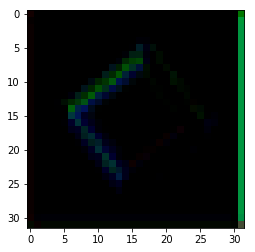

circle


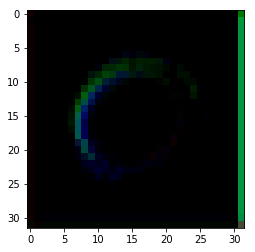

triangle


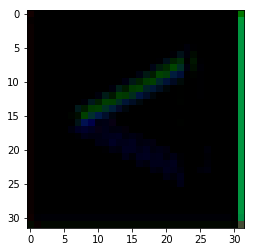

square


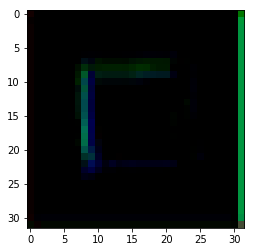

circle


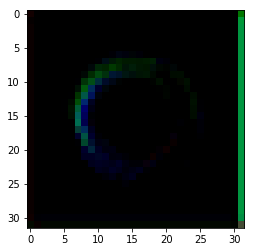

circle


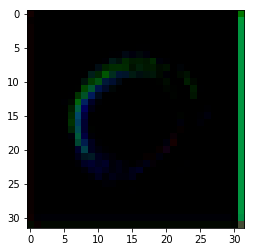

square


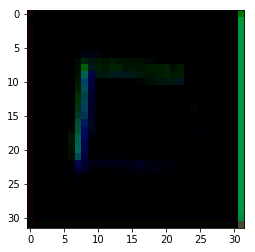

circle


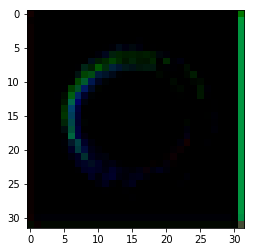

circle


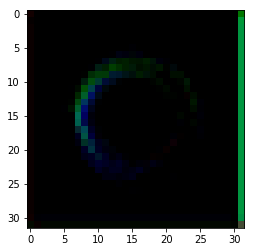

In [14]:
for i in range(30):
    #Original
    print(ClassLabel(np.argmax(X_predicted[i])))
    f = X_test_encoded[i]
    plt.imshow(f, interpolation='nearest')
    plt.show()
#     #encoded
#     f = np.reshape(Xtr[i],(32,32,3))
#     plt.imshow(f, interpolation='nearest')
#     plt.show()
#     #autoencoded
#     f = np.reshape(X_auto[i],(128,128,3))
#     plt.imshow(f, interpolation='nearest')
#     plt.show()